In [158]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [159]:
# Create reference to CSV file
#csv_path = "../Resources/Metro_Interstate_Traffic_Volume.csv"
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
Traffic_Volume_df = pd.read_csv(csv_path)
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<Axes: >

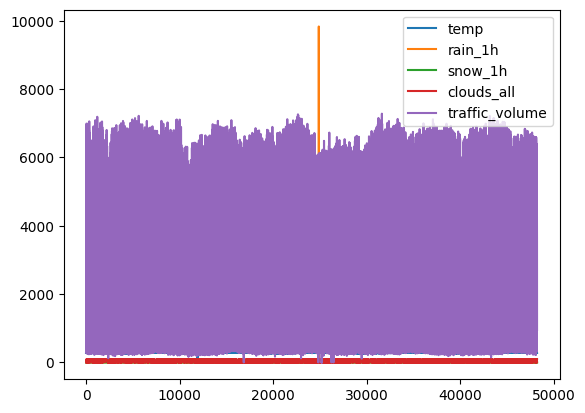

In [160]:
Traffic_Volume_df.plot()

In [161]:
Traffic_Volume_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [162]:
Traffic_Volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [163]:
Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time']) 
Traffic_Volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [164]:
# Convert Kelvin to Farenheit

# Create function to convert from K to F
def kelvin_to_fahrenheit(kelvin):
    fahrenheit = (9/5) * (kelvin - 273.15) + 32
    return fahrenheit


# Apply the function to the DataFrame
Traffic_Volume_df['temp_f'] = Traffic_Volume_df['temp'].apply(kelvin_to_fahrenheit)


# Show first five rows
Traffic_Volume_df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_f
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,59.234
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,61.178
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,61.574
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,62.564
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,64.382


In [165]:
# Set date_time column as index
Traffic_Volume_df.set_index('date_time', inplace=True)
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,temp_f
date_time,,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,59.234
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,61.178
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,61.574
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,62.564
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918,64.382


<Axes: xlabel='date_time'>

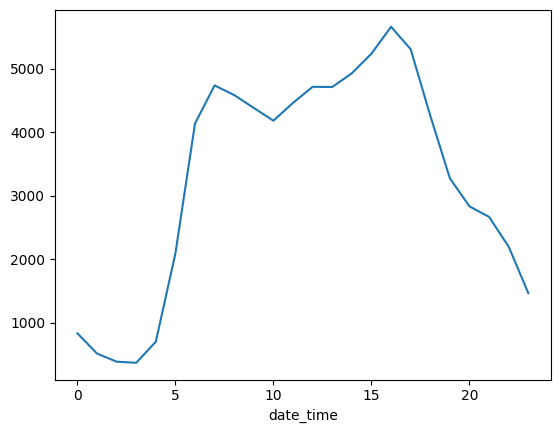

In [166]:

Traffic_Volume_df['traffic_volume'].groupby(Traffic_Volume_df.index.hour).mean().plot()


<Axes: xlabel='date_time'>

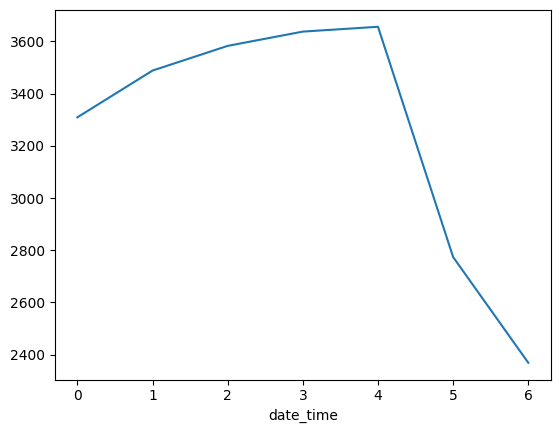

In [167]:
Traffic_Volume_df['traffic_volume'].groupby(Traffic_Volume_df.index.dayofweek).mean().plot()


<Axes: xlabel='week'>

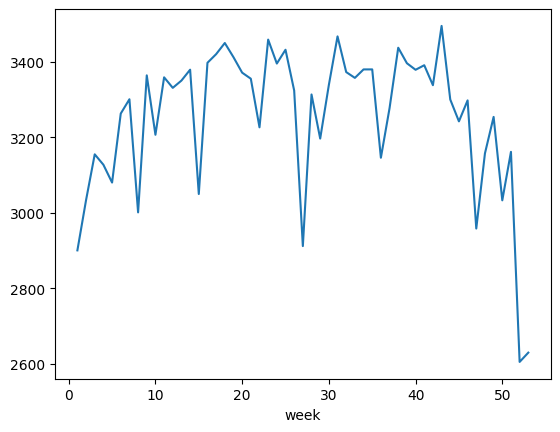

In [168]:
Traffic_Volume_df['traffic_volume'].groupby(Traffic_Volume_df.index.isocalendar().week).mean().plot()

<Axes: xlabel='date_time'>

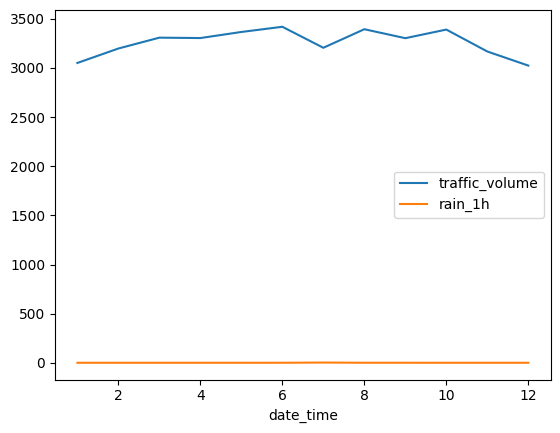

In [169]:
Traffic_Volume_df[['traffic_volume','rain_1h']].groupby(Traffic_Volume_df.index.month).mean().plot()

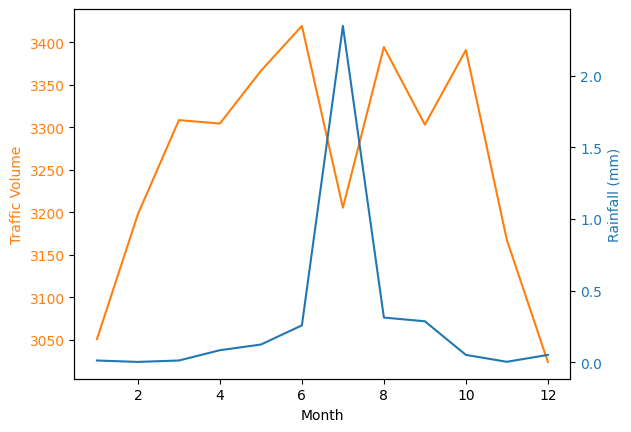

In [170]:



# Grouping data by month and calculating the mean
monthly_data = Traffic_Volume_df[['traffic_volume', 'rain_1h']].groupby(Traffic_Volume_df.index.month).mean()

# Creating a plot with two different y-axes
fig, ax1 = plt.subplots()

# Plotting traffic_volume on the first y-axis
color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_data.index, monthly_data['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for rain_1h
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Rainfall (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_data.index, monthly_data['rain_1h'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


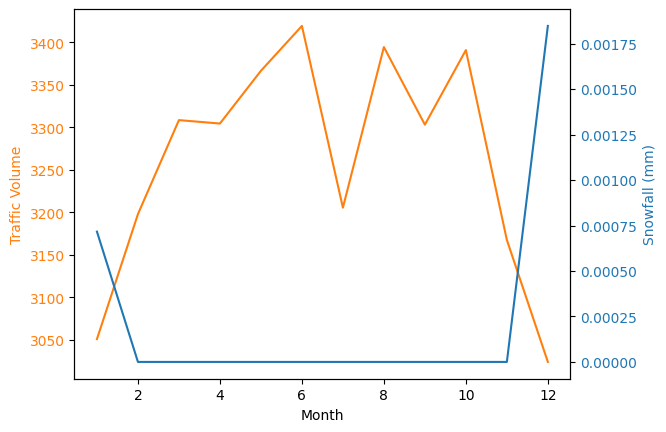

In [171]:



# Grouping data by month and calculating the mean
monthly_data = Traffic_Volume_df[['traffic_volume', 'snow_1h']].groupby(Traffic_Volume_df.index.month).mean()

# Creating a plot with two different y-axes
fig, ax1 = plt.subplots()

# Plotting traffic_volume on the first y-axis
color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_data.index, monthly_data['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for rain_1h
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Snowfall (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_data.index, monthly_data['snow_1h'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


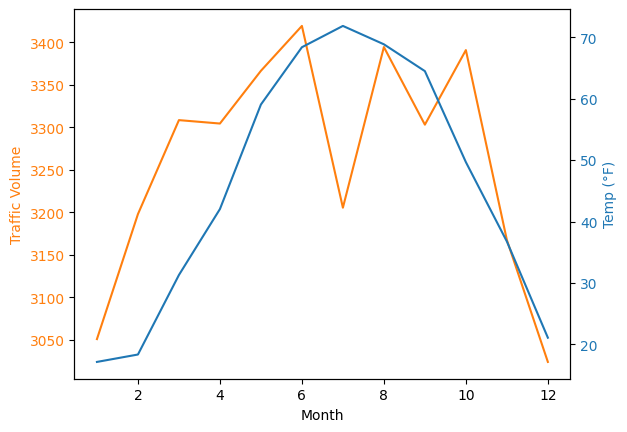

In [172]:

# Grouping data by month and calculating the mean
monthly_data = Traffic_Volume_df[['traffic_volume', 'temp_f']].groupby(Traffic_Volume_df.index.month).mean()

# Creating a plot with two different y-axes
fig, ax1 = plt.subplots()

# Plotting traffic_volume on the first y-axis
color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_data.index, monthly_data['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for rain_1h
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Temp (°F)', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_data.index, monthly_data['temp_f'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

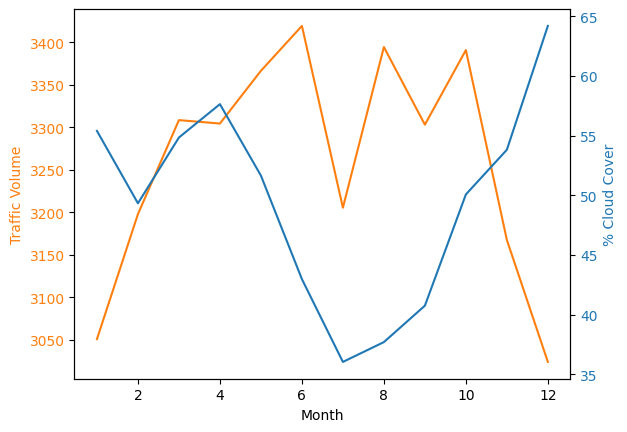

In [173]:

# Grouping data by month and calculating the mean
monthly_data = Traffic_Volume_df[['traffic_volume', 'clouds_all']].groupby(Traffic_Volume_df.index.month).mean()

# Creating a plot with two different y-axes
fig, ax1 = plt.subplots()

# Plotting traffic_volume on the first y-axis
color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_data.index, monthly_data['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for rain_1h
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('% Cloud Cover', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_data.index, monthly_data['clouds_all'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

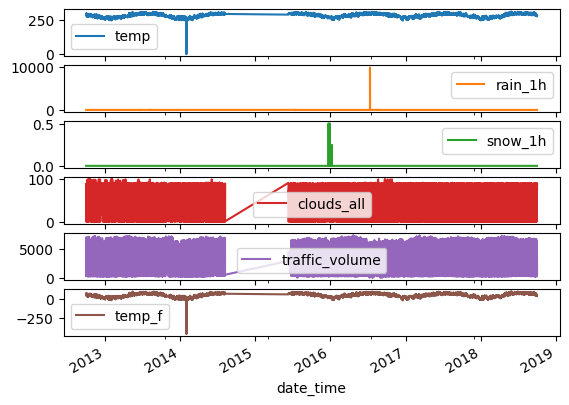

In [174]:
#Plot Traffic Volume to find holes in data
Traffic_Volume_df.plot(subplots=True)

In [175]:
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['temp_f'] >= -50]
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['rain_1h'] <= 407]

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

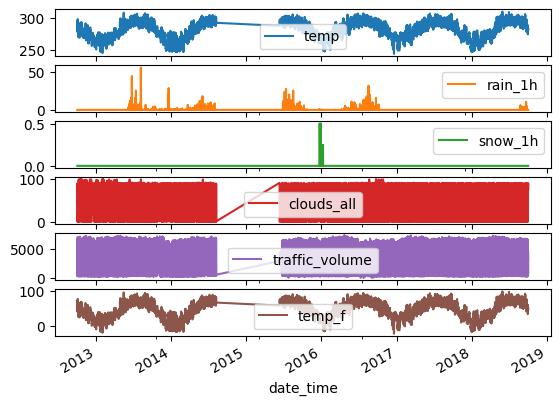

In [176]:
#Plot Traffic Volume to find holes in data
Traffic_Volume_df.plot(subplots=True)

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

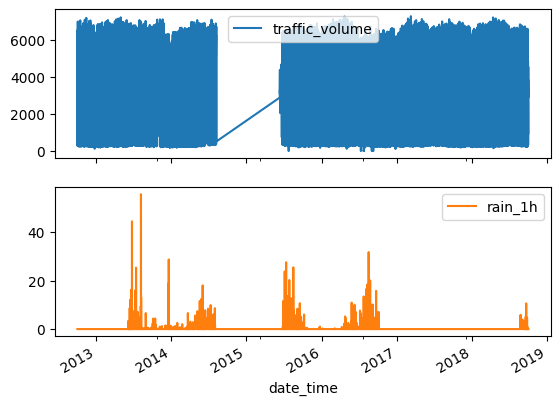

In [177]:
Traffic_Volume_df[['traffic_volume', 'rain_1h']].plot(subplots=True)

In [178]:
#Reset Index
Traffic_Volume_df.reset_index(inplace=True)
Traffic_Volume_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,temp_f
0,2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,59.234
1,2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,61.178
2,2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,61.574
3,2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,62.564
4,2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918,64.382


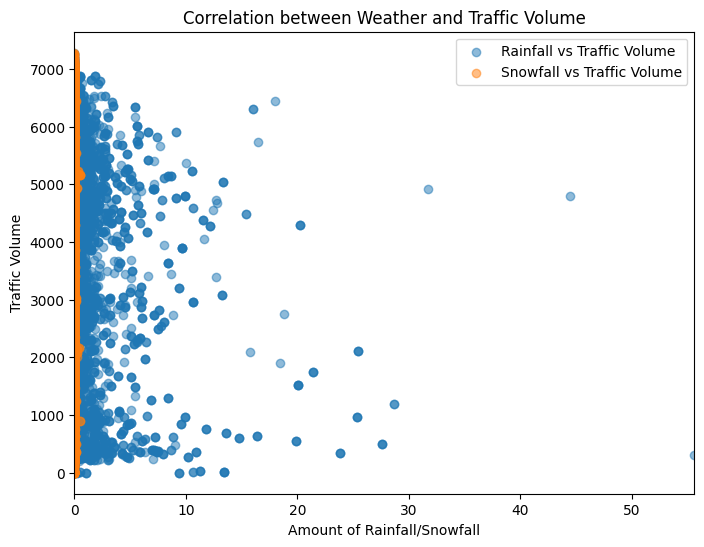

Correlation Matrix:
                traffic_volume   rain_1h   snow_1h    temp_f  clouds_all
traffic_volume        1.000000 -0.022382  0.000729  0.132258    0.066804
rain_1h              -0.022382  1.000000  0.001524  0.089920    0.081485
snow_1h               0.000729  0.001524  1.000000 -0.020859    0.027929
temp_f                0.132258  0.089920 -0.020859  1.000000   -0.112885
clouds_all            0.066804  0.081485  0.027929 -0.112885    1.000000
0.0
55.63


In [179]:
correlation = Traffic_Volume_df[['traffic_volume', 'rain_1h', 'snow_1h', 'temp_f', 'clouds_all']].corr()


plt.figure(figsize=(8, 6))
plt.scatter(Traffic_Volume_df['rain_1h'], Traffic_Volume_df['traffic_volume'], alpha=0.5, label='Rainfall vs Traffic Volume')
plt.scatter(Traffic_Volume_df['snow_1h'], Traffic_Volume_df['traffic_volume'], alpha=0.5, label='Snowfall vs Traffic Volume')
plt.xlabel('Amount of Rainfall/Snowfall')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Correlation between Weather and Traffic Volume')

# Adjust x-axis limits
min_weather = min(Traffic_Volume_df['rain_1h'].min(), Traffic_Volume_df['snow_1h'].min())
max_weather = max(Traffic_Volume_df['rain_1h'].max(), Traffic_Volume_df['snow_1h'].max())
plt.xlim(min_weather, max_weather)


plt.show()

print("Correlation Matrix:")
print(correlation)
print(min_weather)
print(max_weather)

In [180]:


# Read in file
traffic_data = pd.read_csv(csv_path)

# Convert 'date_time' to datetime
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])


# Extract date from 'date_time'
traffic_data['date'] = traffic_data['date_time'].dt.date
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02


In [181]:

# Find unique holidays that are not 'None' and their dates
holiday_mapping = traffic_data[traffic_data['holiday'] != 'None'][['date', 'holiday']].drop_duplicates().set_index('date')['holiday'].to_dict()

# Map the holidays to all rows of the same date using the date column
traffic_data['holiday'] = traffic_data['date'].map(holiday_mapping).fillna(traffic_data['holiday'])

# Drop the temporary date column
traffic_data.drop(columns=['date'], inplace=True)

# Optionally, save the updated DataFrame to a new file
traffic_data.to_csv('updated_traffic_data.csv', index=False)

# Display the updated DataFrame to verify changes
print(traffic_data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  
